<a href="https://colab.research.google.com/github/ravulavarunreddy/-Introduction-to-Machine-Learning---IITKGP/blob/main/Retinopathy_ResNets_Solution_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Source: https://www.kaggle.com/c/diabetic-retinopathy-detection

In [12]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               # Import the necessary packages

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os
import matplotlib.pyplot as plt
import PIL
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from IPython.display import display
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler


In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
os.listdir("/content/drive/MyDrive/DRS/train")

['Severe', 'Moderate', 'Mild', 'Proliferate_DR', 'No_DR']

In [15]:
os.listdir(os.path.join('/content/drive/MyDrive/DRS/train', 'Mild'))

['eeb231c3ef1f.png',
 'e55188915f9d.png',
 '99ecdb41d5e7.png',
 'c8fc0df22999.png',
 'c739ff9580d3.png',
 'ca25745942b0.png',
 'a2696f444ecb.png',
 'b576c5269ad1.png',
 'f5650eb52640.png',
 'cb2f3c5d71a7.png',
 'f0c13be90519.png',
 'b56340f472d2.png',
 'fdd18ccbbdc5.png',
 'c40976189f22.png',
 'ee78ce914066.png',
 'e580676516b0.png',
 'ea15a290eb96.png',
 'a19ecd0a706e.png',
 'd4f32b9c07df.png',
 'c027e5482e8c.png',
 'ca30a97e9d13.png',
 '9782c0489eca.png',
 'ca7140ecf389.png',
 '9eaf735cf01f.png',
 'eed4afc8ec83.png',
 'b71428739d4e.png',
 'af133a85ea0c.png',
 'a95858e052d6.png',
 'a7ec056502e7.png',
 'd85d052900b4.png',
 'b94c58d063bf.png',
 'dbd062558b81.png',
 'cf0575534cec.png',
 'e07045d7c5f7.png',
 'bb11db08584a.png',
 'e9ff9352ccb3.png',
 'ca1036496659.png',
 'ca6842bfcbc9.png',
 'c102db7634d8.png',
 'e96bd80a8a53.png',
 'ef8109305128.png',
 'c4a8f2fcf6e8.png',
 'eba3acc42197.png',
 'ababe19ed448.png',
 'b22354b5f94b.png',
 'cd45bfa07d41.png',
 'bb45257258cc.png',
 '977e1ca7765

In [16]:
# Check the number of images in the dataset
train = []
label = []

# os.listdir returns the list of files in the folder, in this case image class names
for i in os.listdir('/content/drive/MyDrive/DRS/train'):
  train_class = os.listdir(os.path.join('/content/drive/MyDrive/DRS/train', i))
  for j in train_class:
    img = os.path.join('/content/drive/MyDrive/DRS/train', i, j)
    train.append(img)
    label.append(i)

print('Number of train images : {} \n'.format(len(train)))


Number of train images : 3672 



In [17]:
train

['/content/drive/MyDrive/DRS/train/Severe/e93394175a19.png',
 '/content/drive/MyDrive/DRS/train/Severe/f576e45d1da2.png',
 '/content/drive/MyDrive/DRS/train/Severe/bb5083fae98f.png',
 '/content/drive/MyDrive/DRS/train/Severe/fda39982a810.png',
 '/content/drive/MyDrive/DRS/train/Severe/bf8092e4001d.png',
 '/content/drive/MyDrive/DRS/train/Severe/fe0fc67c7980.png',
 '/content/drive/MyDrive/DRS/train/Severe/fcc6aa6755e6.png',
 '/content/drive/MyDrive/DRS/train/Severe/f5a8c6426a71.png',
 '/content/drive/MyDrive/DRS/train/Severe/e0b5a982a018.png',
 '/content/drive/MyDrive/DRS/train/Severe/c76664770c07.png',
 '/content/drive/MyDrive/DRS/train/Severe/c9ea9d5eab65.png',
 '/content/drive/MyDrive/DRS/train/Severe/e32a359be36d.png',
 '/content/drive/MyDrive/DRS/train/Severe/d0079cc188e9.png',
 '/content/drive/MyDrive/DRS/train/Severe/f092febbf5c0.png',
 '/content/drive/MyDrive/DRS/train/Severe/e13412678eff.png',
 '/content/drive/MyDrive/DRS/train/Severe/d16398c971e9.png',
 '/content/drive/MyDrive

In [18]:
label

['Severe',
 'Severe',
 'Severe',
 'Severe',
 'Severe',
 'Severe',
 'Severe',
 'Severe',
 'Severe',
 'Severe',
 'Severe',
 'Severe',
 'Severe',
 'Severe',
 'Severe',
 'Severe',
 'Severe',
 'Severe',
 'Severe',
 'Severe',
 'Severe',
 'Severe',
 'Severe',
 'Severe',
 'Severe',
 'Severe',
 'Severe',
 'Severe',
 'Severe',
 'Severe',
 'Severe',
 'Severe',
 'Severe',
 'Severe',
 'Severe',
 'Severe',
 'Severe',
 'Severe',
 'Severe',
 'Severe',
 'Severe',
 'Severe',
 'Severe',
 'Severe',
 'Severe',
 'Severe',
 'Severe',
 'Severe',
 'Severe',
 'Severe',
 'Severe',
 'Severe',
 'Severe',
 'Severe',
 'Severe',
 'Severe',
 'Severe',
 'Severe',
 'Severe',
 'Severe',
 'Severe',
 'Severe',
 'Severe',
 'Severe',
 'Severe',
 'Severe',
 'Severe',
 'Severe',
 'Severe',
 'Severe',
 'Severe',
 'Severe',
 'Severe',
 'Severe',
 'Severe',
 'Severe',
 'Severe',
 'Severe',
 'Severe',
 'Severe',
 'Severe',
 'Severe',
 'Severe',
 'Severe',
 'Severe',
 'Severe',
 'Severe',
 'Severe',
 'Severe',
 'Severe',
 'Severe',

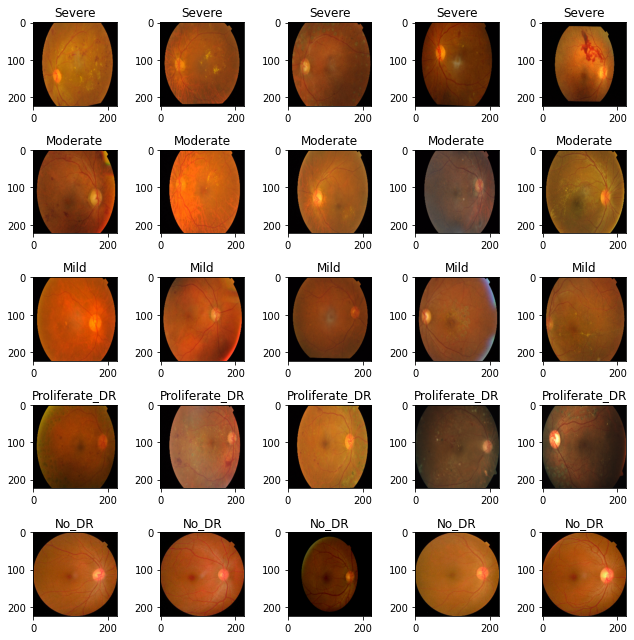

In [19]:
# Visualize 5 images for each class in the dataset

fig, axs = plt.subplots(5, 5, figsize = (9, 9))
count = 0
for i in os.listdir('/content/drive/MyDrive/DRS/train'):
  # get the list of images in a given class
  train_class = os.listdir(os.path.join('/content/drive/MyDrive/DRS/train', i))
  # plot 5 images per class
  for j in range(5):
    img = os.path.join('/content/drive/MyDrive/DRS/train', i, train_class[j])
    img = PIL.Image.open(img)
    axs[count][j].title.set_text(i)
    axs[count][j].imshow(img)  
  count += 1

fig.tight_layout()


In [20]:
# check the number of images in each class in the training dataset

No_images_per_class = []
Class_name = []
for i in os.listdir('/content/drive/MyDrive/DRS/train'):
  train_class = os.listdir(os.path.join('/content/drive/MyDrive/DRS/train', i))
  No_images_per_class.append(len(train_class))
  Class_name.append(i)
  print('Number of images in {} = {} \n'.format(i, len(train_class)))

Number of images in Severe = 193 

Number of images in Moderate = 1009 

Number of images in Mild = 370 

Number of images in Proliferate_DR = 295 

Number of images in No_DR = 1805 



/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

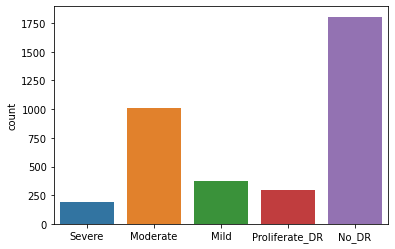

In [21]:
sns.countplot(label)

<function matplotlib.pyplot.show(close=None, block=None)>

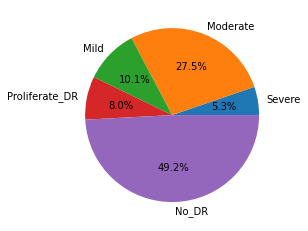

In [22]:
No_images_per_class
Class_name
fig1, ax1 = plt.subplots()
ax1.pie(No_images_per_class, labels = Class_name, autopct = '%1.1f%%')
plt.show

In [23]:
retina_df = pd.DataFrame({'Image': train,'Labels': label})
retina_df

,Image,Labels
0,/content/drive/MyDrive/DRS/train/Severe/e93394...,Severe
1,/content/drive/MyDrive/DRS/train/Severe/f576e4...,Severe
2,/content/drive/MyDrive/DRS/train/Severe/bb5083...,Severe
3,/content/drive/MyDrive/DRS/train/Severe/fda399...,Severe
4,/content/drive/MyDrive/DRS/train/Severe/bf8092...,Severe
...,...,...
3667,/content/drive/MyDrive/DRS/train/No_DR/6ccfdb0...,No_DR
3668,/content/drive/MyDrive/DRS/train/No_DR/8ffa608...,No_DR
3669,/content/drive/MyDrive/DRS/train/No_DR/5995321...,No_DR
3670,/content/drive/MyDrive/DRS/train/No_DR/870fbe6...,No_DR


In [24]:
# Shuffle the data and split it into training and testing
retina_df = shuffle(retina_df)
train, test = train_test_split(retina_df, test_size = 0.2)

In [25]:
# Create run-time augmentation on training and test dataset
# For training datagenerator, we add normalization, shear angle, zooming range and horizontal flip
train_datagen = ImageDataGenerator(
        rescale = 1./255,
        shear_range = 0.2,
        validation_split = 0.15)

# For test datagenerator, we only normalize the data.
test_datagen = ImageDataGenerator(rescale = 1./255)

In [26]:
# Creating datagenerator for training, validation and test dataset.

train_generator = train_datagen.flow_from_dataframe(
    train,
    directory='/content/drive/MyDrive/DRS',
    x_col="Image",
    y_col="Labels",
    target_size=(256, 256),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    subset='training')

validation_generator = train_datagen.flow_from_dataframe(
    train,
    directory='/content/drive/MyDrive/DRS',
    x_col="Image",
    y_col="Labels",
    target_size=(256, 256),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    subset='validation')

test_generator = test_datagen.flow_from_dataframe(
    test,
    directory='/content/drive/MyDrive/DRS',
    x_col="Image",
    y_col="Labels",
    target_size=(256, 256),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32)

Found 2497 validated image filenames belonging to 5 classes.
Found 440 validated image filenames belonging to 5 classes.
Found 735 validated image filenames belonging to 5 classes.


In [27]:
def res_block(X, filter, stage):
  
  # Convolutional_block
  X_copy = X

  f1 , f2, f3 = filter
    
  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_conv_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = MaxPool2D((2,2))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_conv_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_c')(X)


  # Short path
  X_copy = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_copy', kernel_initializer= glorot_uniform(seed = 0))(X_copy)
  X_copy = MaxPool2D((2,2))(X_copy)
  X_copy = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_copy')(X_copy)

  # ADD
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  # Identity Block 1
  X_copy = X


  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_1_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_1_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_1_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_c')(X)

  # ADD
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  # Identity Block 2
  X_copy = X


  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_2_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_2_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_2_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_c')(X)

  # ADD
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  return X

In [28]:

input_shape = (256,256,3)

#Input tensor shape
X_input = Input(input_shape)

#Zero-padding

X = ZeroPadding2D((3,3))(X_input)

# 1 - stage

X = Conv2D(64, (7,7), strides= (2,2), name = 'conv1', kernel_initializer= glorot_uniform(seed = 0))(X)
X = BatchNormalization(axis =3, name = 'bn_conv1')(X)
X = Activation('relu')(X)
X = MaxPooling2D((3,3), strides= (2,2))(X)

# 2- stage

X = res_block(X, filter= [64,64,256], stage= 2)

# 3- stage

X = res_block(X, filter= [128,128,512], stage= 3)

# 4- stage

X = res_block(X, filter= [256,256,1024], stage= 4)

# # 5- stage

# X = res_block(X, filter= [512,512,2048], stage= 5)

#Average Pooling

X = AveragePooling2D((2,2), name = 'Averagea_Pooling')(X)

#Final layer

X = Flatten()(X)
X = Dense(5, activation = 'softmax', name = 'Dense_final', kernel_initializer= glorot_uniform(seed=0))(X)


model = Model( inputs= X_input, outputs = X, name = 'Resnet18')

model.summary()

Model: "Resnet18"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 262, 262, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1 (Conv2D)                 (None, 128, 128, 64  9472        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                           

In [29]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics= ['accuracy'])


In [30]:
#using early stopping to exit training if validation loss is not decreasing even after certain epochs (patience)
earlystopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)

#save the best model with lower validation loss
checkpointer = ModelCheckpoint(filepath="weights.hdf5", verbose=1, save_best_only=True)

In [31]:

history = model.fit(train_generator, steps_per_epoch = train_generator.n // 32, epochs = 6, validation_data= validation_generator, validation_steps= validation_generator.n // 32, callbacks=[checkpointer , earlystopping])

Epoch 1/6
78/78 [==============================] - ETA: 0s - loss: 1.4503 - accuracy: 0.6609
Epoch 1: val_loss improved from inf to 1.63008, saving model to weights.hdf5
78/78 [==============================] - 792s 10s/step - loss: 1.4503 - accuracy: 0.6609 - val_loss: 1.6301 - val_accuracy: 0.2668
Epoch 2/6
78/78 [==============================] - ETA: 0s - loss: 0.7841 - accuracy: 0.7274
Epoch 2: val_loss did not improve from 1.63008
78/78 [==============================] - 717s 9s/step - loss: 0.7841 - accuracy: 0.7274 - val_loss: 1.6388 - val_accuracy: 0.2692
Epoch 3/6
78/78 [==============================] - ETA: 0s - loss: 0.7175 - accuracy: 0.7456
Epoch 3: val_loss improved from 1.63008 to 1.57670, saving model to weights.hdf5
78/78 [==============================] - 735s 9s/step - loss: 0.7175 - accuracy: 0.7456 - val_loss: 1.5767 - val_accuracy: 0.2644
Epoch 4/6
78/78 [==============================] - ETA: 0s - loss: 0.7038 - accuracy: 0.7558
Epoch 4: val_loss did not improv

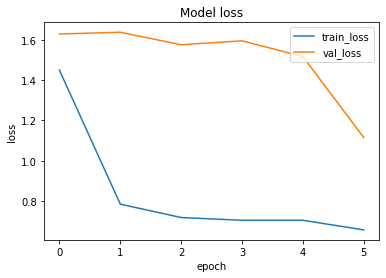

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
plt.show()


In [33]:
model.load_weights("/content/drive/MyDrive/DRS/retina_weights.hdf5")

In [34]:
# Evaluate the performance of the model
evaluate = model.evaluate(test_generator, steps = test_generator.n // 32, verbose =1)

print('Accuracy Test : {}'.format(evaluate[1]))

22/22 [==============================] - 96s 4s/step - loss: 0.5028 - accuracy: 0.8267
Accuracy Test : 0.8267045617103577


In [35]:
# Assigning label names to the corresponding indexes
labels = {0: 'Mild', 1: 'Moderate', 2: 'No_DR', 3:'Proliferate_DR', 4: 'Severe'}

In [36]:
# Loading images and their predictions 

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
# import cv2

prediction = []
original = []
image = []
count = 0

for item in range(len(test)):
  # code to open the image
  img= PIL.Image.open(test['Image'].tolist()[item])
  # resizing the image to (256,256)
  img = img.resize((256,256))
  # appending image to the image list
  image.append(img)
  # converting image to array
  img = np.asarray(img, dtype= np.float32)
  # normalizing the image
  img = img / 255
  # reshaping the image in to a 4D array
  img = img.reshape(-1,256,256,3)
  # making prediction of the model
  predict = model.predict(img)
  # getting the index corresponding to the highest value in the prediction
  predict = np.argmax(predict)
  # appending the predicted class to the list
  prediction.append(labels[predict])
  # appending original class to the list
  original.append(test['Labels'].tolist()[item])


1/1 [==============================] - 0s 71ms/step


In [37]:
# Getting the test accuracy 
score = accuracy_score(original, prediction)
print("Test Accuracy : {}".format(score))

Test Accuracy : 0.8231292517006803


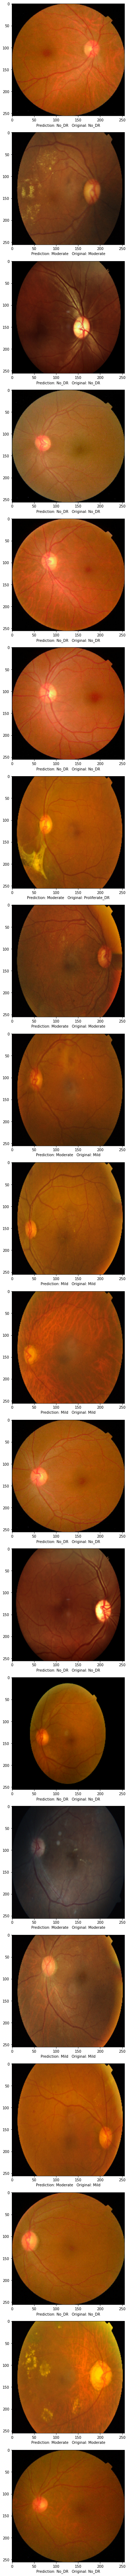

In [38]:
# Visualizing the results
import random
fig=plt.figure(figsize = (100,100))
for i in range(20):
    j = random.randint(0,len(image))
    fig.add_subplot(20, 1, i+1)
    plt.xlabel("Prediction: " + prediction[j] +"   Original: " + original[j])
    plt.imshow(image[j])
fig.tight_layout()
plt.show()

In [39]:
tf.keras.preprocessing.image.ImageDataGenerator(
      featurewise_center=False,
      samplewise_center=False,
      featurewise_std_normalization=False,
      samplewise_std_normalization=False,
      zca_whitening=False,
      zca_epsilon=1e-06,
      rotation_range=0,
      width_shift_range=0.0,
      height_shift_range=0.0,
      brightness_range=None,
      shear_range=0.0,
      zoom_range=0.0,
      channel_shift_range=0.0,
      fill_mode="nearest",
      cval=0.0,
      horizontal_flip=False,
      vertical_flip=False,
      rescale=None,
      preprocessing_function=None,
      data_format=None,
      validation_split=0.3,
      dtype=None)

In [40]:
# Print out the classification report
print(classification_report(np.asarray(original), np.asarray(prediction)))


                precision    recall  f1-score   support

          Mild       0.82      0.59      0.69        76
      Moderate       0.65      0.79      0.71       168
         No_DR       0.95      0.98      0.96       381
Proliferate_DR       0.57      0.55      0.56        60
        Severe       0.85      0.44      0.58        50

      accuracy                           0.82       735
     macro avg       0.77      0.67      0.70       735
  weighted avg       0.83      0.82      0.82       735



Text(0.5, 1.0, 'Confusion_matrix')

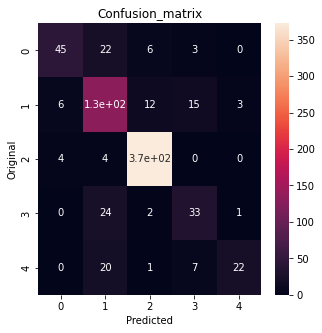

In [41]:

# plot the confusion matrix
plt.figure(figsize = (5,5))
cm = confusion_matrix(np.asarray(original), np.asarray(prediction))
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)

ax.set_xlabel('Predicted')
ax.set_ylabel('Original')
ax.set_title('Confusion_matrix')
